Data from 
http://www.ssa.gov/oact/babynames/limits.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.count()

name      2000
sex       2000
births    2000
dtype: int64

In [6]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110491


In [7]:
years = range(1880, 2015)

In [8]:
pieces = []
columns = ['name', 'sex', 'births']

In [9]:
for year in years:
    path = 'names/yob{}.txt'.format(year)
    df = pd.read_csv(path, names=columns)
    
    df['year'] = year
    pieces.append(df)
    
names = pd.concat(pieces, ignore_index=True)

In [10]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [11]:
names.count()

name      1825433
sex       1825433
births    1825433
year      1825433
dtype: int64

In [12]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [13]:
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


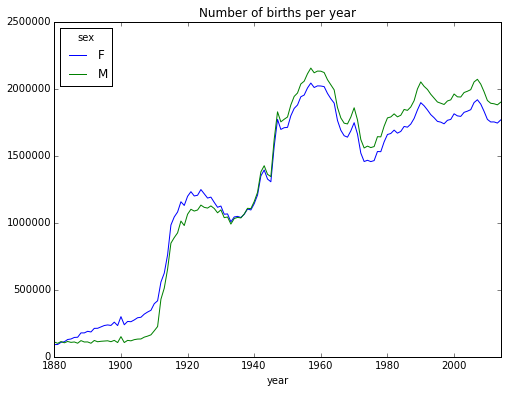

In [14]:
total_births.plot(figsize=(8, 6), grid=False, title="Number of births per year")

In [15]:
def add_prop(group):
# Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [16]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [17]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
# Verify that prop column sums to 1 for each year
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [19]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [20]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [21]:
top1000.head(10)

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015540
         8     Bertha   F    1320  1880  0.014507
         9      Sarah   F    1288  1880  0.014155

In [22]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [23]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [24]:
total_births.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,...,13,31,NaN,NaN,14,6,8,58,27,NaN


In [25]:
subset = total_births[['Kristopher']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x104f61748>], dtype=object)

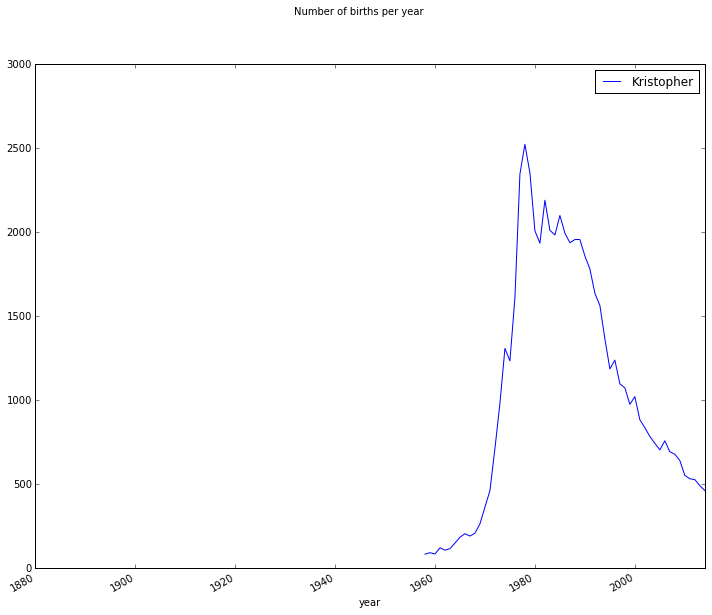

In [26]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")